In [1]:
import pymove as pm
import pandas as pd
import numpy as np
import utilities.constants as const

from core.TrajectoryDF import NumPandasTraj as TrajDF
from preprocessing.filters import Filters as filt
from features.spatial_features import SpatialFeatures as spatial
from utilities.conversions import Conversions as con
from preprocessing.interpolation import Interpolate as ip

In [2]:
# atlantic = pd.read_csv('./data/atlantic.csv')
# atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
# def convert_to_datetime(row):
#         this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
#         this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
#         return '{} {}'.format(this_date, this_time)
# atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)
#
# gulls = pd.read_csv('./data/gulls.csv')

geolife = pd.read_csv('./data/sample.csv')

In [3]:
%%time
#
# np_atlantic = TrajDF(atlantic,
#                          latitude='Latitude',
#                          longitude='Longitude',
#                          datetime='DateTime',
#                          traj_id='ID',
#                          rest_of_columns=[])
#
# np_gulls = TrajDF(gulls,
#                  latitude='location-lat',
#                  longitude='location-long',
#                  datetime='timestamp',
#                  traj_id='tag-local-identifier',
#                  rest_of_columns=[])

np_geolife = TrajDF(geolife,latitude='lat',
                     longitude='lon',
                     datetime='datetime',
                     traj_id='id')


CPU times: user 17.3 ms, sys: 265 µs, total: 17.6 ms
Wall time: 15.6 ms


In [4]:
# %%time
#
# np_geolife = spatial.create_distance_between_consecutive_column(np_geolife)
# ip_geolife = ip.interpolate_position(np_geolife.reset_index(), 30)

In [5]:
# ip_geolife.shape
#

In [6]:
# np_geolife.shape

In [7]:
# ip_geolife.head(11)

In [8]:
# np_geolife.head(11)

In [9]:
# ip_geolife.loc[ip_geolife[const.LAT] < 0]

In [10]:
np_geolife = spatial.create_distance_between_consecutive_column(np_geolife)
ip_geolife = ip.cubic_alt(dataframe=np_geolife, distance_threshold=10)
ip_geolife.head()

lat                 lon  \
traj_id DateTime                                                      
1       2008-10-22 07:27:17  -115375057.7061615  223058292.84436035   
        2008-10-23 05:53:03           39.984211  116.31938899999999   
        2008-10-23 05:53:08  39.984216999999994  116.31942200000002   
        2008-10-23 05:53:11             39.9842             116.319   
        2008-10-23 05:53:13   39.98478572959182  116.31992199081631   

                             Distance_prev_to_curr  
traj_id DateTime                                    
1       2008-10-22 07:27:17                    0.0  
        2008-10-23 05:53:03                    0.0  
        2008-10-23 05:53:08                    0.0  
        2008-10-23 05:53:11                    NaN  
        2008-10-23 05:53:13                    0.0

In [11]:
ip_geolife.shape

(1342, 3)

In [12]:
ip_geolife.to_csv('abc.csv')
#ip_geolife = spatial.create_distance_between_consecutive_column(ip_geolife)
#ip_geolife

In [13]:
np_geolife.to_csv('123.csv')

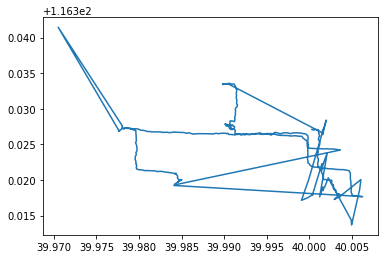

In [14]:
import matplotlib.pyplot as plt

plt.plot(np_geolife[const.LAT], np_geolife[const.LONG])


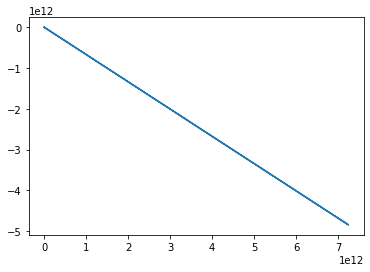

In [15]:
plt.plot(ip_geolife[const.LAT], ip_geolife[const.LONG])


In [26]:
abc = pd.read_csv('abc.csv')

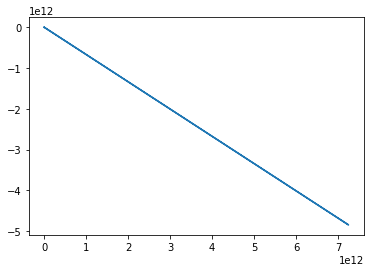

In [27]:

plt.plot(abc['lat'], abc['lon'])

In [28]:
abc = spatial.create_distance_between_consecutive_column(abc)
abc.head()

index        lat         lon  \
traj_id DateTime                                            
1       2008-10-23 05:53:03      0  39.984211  116.319389   
        2008-10-23 05:53:08      1  39.984217  116.319422   
        2008-10-23 05:53:11      2  39.984224  116.319402   
        2008-10-23 05:53:13      3  39.984786  116.319922   
        2008-10-23 05:53:16      4  39.984211  116.319389   

                             Distance_prev_to_curr  
traj_id DateTime                                    
1       2008-10-23 05:53:03                    NaN  
        2008-10-23 05:53:08               2.889671  
        2008-10-23 05:53:11               1.873356  
        2008-10-23 05:53:13              76.578015  
        2008-10-23 05:53:16              78.397889

In [29]:
d = filt.filter_outliers_by_consecutive_distance(abc)
d.shape

(1249, 4)

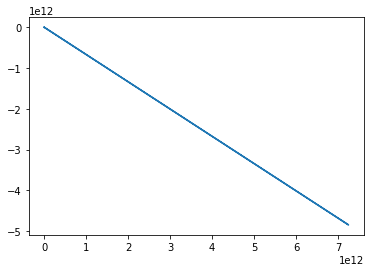

In [30]:
plt.plot(abc['lat'], abc['lon'])